# Επίδοση 2


## Σώμα simulation

Regen cycles = 1000


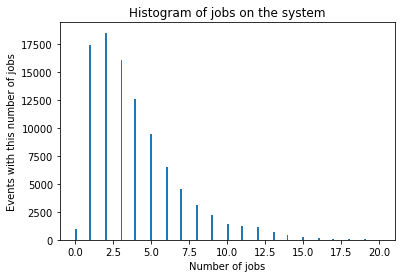

In [33]:
import numpy as np
import heapq
from scipy.stats import poisson
from collections import deque
import matplotlib.pyplot as plt

def average(list_A):
    return(sum(list_A[1:])/(len(list_A) - 1))

def Poisson_arrivals(average_time,num_points = 1):
    X = - float(np.log(U(num_points))) * average_time
    arrivals_dict[average_time].append(X)
    return X

def new_arrival():
    average_time = 1000/2.1
    return Poisson_arrivals(average_time)

def U(num_points = 1):
    return float(np.random.uniform(size = num_points))

def category():
    p_A = 0.9 / 2.1
    category_prob = U()
    if category_prob <= p_A:
        return "A"
    else:
        return "B"

def next_event(arrival,CPU,DISK):
    if CPU == None:
        if DISK != None and DISK < arrival:
            return "DISK"
        else:
            return "arrival"
    elif DISK == None:
        if CPU != None and CPU < arrival:
            return "CPU"
        else:
            return "arrival"
    else:
        if arrival < DISK  and arrival < CPU:
            return "arrival"
        elif CPU < DISK:
            return "CPU"
        else:
            return "DISK"


def status(Event):
    plot_list[0].append(len(CPU_queue_A) + len(CPU_queue_B) + int(not empty_CPU))
    plot_list[1].append(len(DISK_queue) + int(not empty_DISK))
    return


# There are a few things left that are no longer needed
# parameters R_A, R_B, U_CPU, U_DISK (probably) don't provide any infomation and can be removed 
# function status and whatever derives from its use is also leftover and doesn't provide anything useful

# Initialize

plot_list = [[],[]]
CPU_queue_A = deque([])
CPU_queue_B = deque([])
DISK_queue = deque([])

CPU_current_job = None
CPU_current_type = None
CPU_start_time = None
CPU_remaining_time = None

DISK_current_job = None
DISK_current_type = None
DISK_start_time = None
DISK_remaining_time = None

job_id = 1
clock = 0
curr_jobs = 0
clock = 0

arrivals_dict = {}
for average_time in [1000/2.1, 31, 42, 26, 29]:
    arrivals_dict[average_time] = []

# Initialize statistics

arrival_time = {}
departure_time = {}
disk_visits = {}

R_A = []
R_A_different = []
R_B = []
R_B_different = []

U_CPU = []
U_CPU_different = []
U_DISK = []
U_DISK_different = []

ci_list   = []
ci_a = []
ci_b = []

CPU_EMPTY_TIME  = 0
DISK_EMPTY_TIME = 0

# CPU arrival time
CPU_arrival = new_arrival()
DISK_EMPTY_TIME = CPU_EMPTY_TIME = 0
DISK_LAST_EMPTY = CPU_LAST_EMPTY = 0

# CPU processing time
empty_CPU = True


# DISK processing time
empty_DISK = True
regens = 0

old_clock = 0
Checkpoint = True
job_A, job_B = [], []

B_Checkpoint = True

while (B_Checkpoint and regens < 1000):

    # start of the regen cycle
    # Everything is empty
    if empty_CPU and empty_DISK:

        # check the confidence interval every 20 cycles
        if (regens - 1) % 20 == 0 and regens != 1:

            # calculate s ^ 2
            y_bar = average(R_B_different)
            c_bar = average(ci_b)
            n = regens - 1

            sy = 0
            sc = 0
            syc = 0
            for i in range(1,regens):
                sy += (R_B_different[i] - y_bar) ** 2
                sc += (ci_b[i] - c_bar) ** 2
                syc += (R_B_different[i] - y_bar) * (ci_b[i] - c_bar)

            sy /= n - 1
            sc /= n - 1
            syc /= n - 1
            R = average(R_B_different) / average(ci_b)
            s = sy - 2 * R * syc + R ** 2 * sc
            
            # z for 0.95
            z1_a_2 =  1.960
            confidence_interval = z1_a_2 * float(np.sqrt(s)) / (c_bar * float(np.sqrt(n)))

            if confidence_interval / R < 0.1:
                B_Checkpoint = False
                break

        # register cycle length
        cycle_length = clock-old_clock
        ci_list.append(clock-old_clock)
        old_clock = clock
       
        # R_A
        R_A_cycle = 0
        if job_A:
            for job in job_A:
                R_A_cycle += (departure_time[job] - arrival_time[job])
# 
            R_A_different.append(R_A_cycle)
            ci_a.append(len(job_A))
# 
            R_A_cycle /= len(job_A)
        else:
            R_A_different.append(0)
            ci_a.append(0)

        R_A.append(R_A_cycle)

        # R_B
        R_B_cycle = 0
        if job_B:
            for job in job_B:
                R_B_cycle += (departure_time[job] - arrival_time[job])
# 
            R_B_different.append(R_B_cycle)
            ci_b.append(len(job_B))
# 
            R_B_cycle /= len(job_B)
        else:
            R_B_different.append(0)
            ci_b.append(0)
        R_B.append(R_B_cycle)
        
        if cycle_length == 0:
            cycle_length = 1

        # U_CPU
        U_CPU_cycle = CPU_EMPTY_TIME / cycle_length
        U_CPU_different.append(CPU_EMPTY_TIME)
        CPU_EMPTY_TIME = 0
        U_CPU.append(U_CPU_cycle)

        # U_DISK
        U_DISK_cycle = DISK_EMPTY_TIME / cycle_length
        U_DISK_different.append(DISK_EMPTY_TIME)
        DISK_EMPTY_TIME = 0
        U_DISK.append(U_DISK_cycle)

        regens += 1
        clock = CPU_arrival
        CPU_EMPTY_TIME += (clock - CPU_LAST_EMPTY)

        job_A, job_B = [], []

        # define the class of the arrival
        # begin the job's execution
        if category() == "A":
            # find job's processing time and assign the job to the CPU
            processing_time = Poisson_arrivals(31)
            CPU_current_job = job_id
            job_A.append(job_id)
            CPU_current_type = "A"
            CPU_start_time = clock
            CPU_remaining_time = processing_time
        else:
            # find job's processing time and assign the job to the CPU
            processing_time = Poisson_arrivals(42)
            CPU_current_job = job_id
            job_B.append(job_id)
            CPU_current_type = "B"
            CPU_start_time = clock
            CPU_remaining_time = processing_time

        # define new arrival time and increment number of jobs
        arrival_time[job_id] = clock
        disk_visits[job_id] = 0
        CPU_arrival = clock + new_arrival()
        job_id += 1
        curr_jobs += 1
        empty_CPU = False
        status("Empty arrival")

    elif empty_DISK:

        # handle new arrival
        if next_event(CPU_arrival, CPU_start_time + CPU_remaining_time,None) == "arrival":
            clock = CPU_arrival
            arrival_time[job_id] = clock
            disk_visits[job_id] = 0

            if category() == "A":
                job_A.append(job_id)
                if CPU_current_type == "A":
                    processing_time = Poisson_arrivals(31)
                    CPU_queue_A.append([job_id,processing_time])
                elif CPU_current_type == "B":
                    processing_time_left = CPU_start_time + CPU_remaining_time - clock
                    CPU_queue_B.appendleft([CPU_current_job,processing_time_left])

                    # assign new job A to the CPU
                    processing_time = Poisson_arrivals(31)
                    CPU_current_job = job_id
                    CPU_current_type = "A"
                    CPU_start_time = clock
                    CPU_remaining_time = processing_time
            else:
                job_B.append(job_id)
                # place new job at B queue
                processing_time = Poisson_arrivals(42)
                CPU_queue_B.append([job_id,processing_time])

            # define new arrival time and increment number of jobs
            CPU_arrival = clock + new_arrival()
            empty_CPU = False
            curr_jobs += 1
            job_id += 1
            status("arrival")

        else:
            clock = CPU_start_time + CPU_remaining_time
            # job leaves the system with pA = 1/10 or pB = 1/8
            Uniform = U()
            if (CPU_current_type == "A" and Uniform <= 1/10) or (CPU_current_type == "B" and Uniform <= 1/8):
                departure_time[CPU_current_job] = clock
                if CPU_queue_A:
                    CPU_current_job, CPU_remaining_time = CPU_queue_A.popleft()
                    CPU_current_type = "A"
                    CPU_start_time = clock
                elif CPU_queue_B:
                    CPU_current_job, CPU_remaining_time = CPU_queue_B.popleft()
                    CPU_current_type = "B"
                    CPU_start_time = clock
                elif not CPU_queue_A and not CPU_queue_B:
                    CPU_current_job, CPU_current_type, CPU_remaining_time, CPU_start_time = None, None, None, None
                    CPU_LAST_EMPTY = clock
                    empty_CPU = True

                curr_jobs -= 1
            else:
                # load job to the empty disk
                disk_visits[CPU_current_job] += 1
                if CPU_current_type == "A":
                    processing_time = Poisson_arrivals(26)
                else:
                    processing_time = Poisson_arrivals(29)
                DISK_current_job = CPU_current_job
                DISK_remaining_time = processing_time
                DISK_current_type = CPU_current_type
                DISK_start_time = clock
                DISK_EMPTY_TIME += (clock - DISK_LAST_EMPTY)
                empty_DISK = False

                # load new job to the CPU
                if CPU_queue_A:
                    CPU_current_job, CPU_remaining_time = CPU_queue_A.popleft()
                    CPU_current_type = "A"
                    CPU_start_time = clock
                elif CPU_queue_B:
                    CPU_current_job, CPU_remaining_time = CPU_queue_B.popleft()
                    CPU_current_type = "B"
                    CPU_start_time = clock
                elif not CPU_queue_A and not CPU_queue_B:
                    CPU_current_job, CPU_current_type, CPU_remaining_time, CPU_start_time = None, None, None, None
                    empty_CPU = True
            status("CPU")


    elif empty_CPU:

        # handle new arrival
        if next_event(CPU_arrival, None, DISK_start_time + DISK_remaining_time) == "arrival":
            clock = CPU_arrival
            arrival_time[job_id] = clock
            disk_visits[job_id] = 0

            if category() == "A":
                job_A.append(job_id)
                CPU_remaining_time = Poisson_arrivals(31)
                CPU_current_type = "A"
            else:
                job_B.append(job_id)
                CPU_remaining_time = Poisson_arrivals(42)
                CPU_current_type = "B"
            
            CPU_EMPTY_TIME += (clock - CPU_LAST_EMPTY)
            CPU_current_job = job_id
            CPU_start_time = clock
            CPU_arrival = clock + new_arrival()
            empty_CPU = False
            curr_jobs += 1
            job_id += 1
            status("arrival")

        else:
            clock = DISK_start_time + DISK_remaining_time
           # load job to the empty CPU
            if DISK_current_type == "A":
                processing_time = Poisson_arrivals(31)
            else:
                processing_time = Poisson_arrivals(42)
            CPU_current_job = DISK_current_job 
            CPU_remaining_time = processing_time
            CPU_current_type = DISK_current_type
            CPU_start_time = clock
            empty_CPU = False

            # load new job to the DISK
            if DISK_queue:
                DISK_current_job, DISK_remaining_time, DISK_current_type = DISK_queue.popleft()
                DISK_start_time = clock
            elif not DISK_queue:
                DISK_current_job, DISK_current_type, DISK_remaining_time, DISK_start_time = None, None, None, None
                DISK_LAST_EMPTY = clock
                empty_DISK = True
            status("DISK")

    else:

        # handle new arrival
        if next_event(CPU_arrival, CPU_start_time + CPU_remaining_time, DISK_start_time + DISK_remaining_time) == "arrival":
            clock = CPU_arrival
            arrival_time[job_id] = clock
            disk_visits[job_id] = 0

            if category() == "A":
                job_A.append(job_id)
                if CPU_current_type == "A":
                    processing_time = Poisson_arrivals(31)
                    CPU_queue_A.append([job_id,processing_time])
                elif CPU_current_type == "B":
                    # return job B to its queue (first item)
                    processing_time_left = CPU_start_time + CPU_remaining_time - clock
                    CPU_queue_B.appendleft([CPU_current_job,processing_time_left])

                    # assign new job A to the CPU
                    processing_time = Poisson_arrivals(31)
                    CPU_current_job = job_id
                    CPU_current_type = "A"
                    CPU_start_time = clock
                    CPU_remaining_time = processing_time
            else:
                # place new job at B queue
                processing_time = Poisson_arrivals(42)
                CPU_queue_B.append([job_id,processing_time])
                job_B.append(job_id)

            # define new arrival time and increment number of jobs
            CPU_arrival = clock + new_arrival()
            empty_CPU = False
            curr_jobs += 1
            job_id += 1
            status("arrival")

        elif next_event(CPU_arrival, CPU_start_time + CPU_remaining_time, DISK_start_time + DISK_remaining_time) == "CPU":
            clock = CPU_start_time + CPU_remaining_time
            # job leaves the system with pA = 1/10 or pB = 1/8
            Uniform = U()
            if (CPU_current_type == "A" and Uniform <= 1/10) or (CPU_current_type == "B" and Uniform <= 1/8):
                departure_time[CPU_current_job] = clock
                if CPU_queue_A:
                    CPU_current_job, CPU_remaining_time = CPU_queue_A.popleft()
                    CPU_current_type = "A"
                    CPU_start_time = clock
                elif CPU_queue_B:
                    CPU_current_job, CPU_remaining_time = CPU_queue_B.popleft()
                    CPU_current_type = "B"
                    CPU_start_time = clock
                elif not CPU_queue_A and not CPU_queue_B:
                    CPU_current_job, CPU_current_type, CPU_remaining_time, CPU_start_time = None, None, None, None
                    CPU_LAST_EMPTY = clock
                    empty_CPU = True
                curr_jobs -= 1
            else:
                # load job to the disk queue
                disk_visits[CPU_current_job] += 1
                if CPU_current_type == "A":
                    processing_time = Poisson_arrivals(26)
                else:
                    processing_time = Poisson_arrivals(29)
                DISK_queue.append([CPU_current_job,processing_time,CPU_current_type])

                # load new job to the CPU
                if CPU_queue_A:
                    CPU_current_job, CPU_remaining_time = CPU_queue_A.popleft()
                    CPU_current_type = "A"
                    CPU_start_time = clock
                elif CPU_queue_B:
                    CPU_current_job, CPU_remaining_time = CPU_queue_B.popleft()
                    CPU_current_type = "B"
                    CPU_start_time = clock
                elif not CPU_queue_A and not CPU_queue_B:
                    CPU_current_job, CPU_current_type, CPU_remaining_time, CPU_start_time = None, None, None, None
                    CPU_LAST_EMPTY = clock
                    empty_CPU = True
            status("CPU")

        else:
            clock = DISK_start_time + DISK_remaining_time
            # load job to the CPU
            if DISK_current_type == "A":
                processing_time = Poisson_arrivals(31)
            else:
                processing_time = Poisson_arrivals(42)
            
            # Current - A, Coming - A
            if CPU_current_type == "A" and DISK_current_type == "A":
                CPU_queue_A.append([DISK_current_job,processing_time])
            # Current - B, Coming - A
            elif CPU_current_type == "B" and DISK_current_type == "B":
                # return job B to its queue (first item)
                processing_time_left = CPU_start_time + CPU_remaining_time - clock
                CPU_queue_B.appendleft([CPU_current_job,processing_time_left])

                # assign new job A to the CPU
                CPU_current_job = DISK_current_job
                CPU_current_type = "A"
                CPU_start_time = clock
                CPU_remaining_time = processing_time
            # Current - X, Coming - B
            else:
                # place new job at B queue
                CPU_queue_B.append([DISK_current_job,processing_time])

            # load new job to the DISK
            if DISK_queue:
                DISK_current_job, DISK_remaining_time, DISK_current_type = DISK_queue.popleft()
                DISK_start_time = clock
            elif not DISK_queue:
                DISK_current_job, DISK_current_type, DISK_remaining_time, DISK_start_time = None, None, None, None
                DISK_LAST_EMPTY = clock
                empty_DISK = True
            status("DISK")

print("Regen cycles =",regens)
t = list(range(len(plot_list[0])))
plt.hist([x + y for (x, y) in zip(plot_list[0],plot_list[1])],bins = "auto")
plt.title("Histogram of jobs on the system")
plt.xlabel("Number of jobs")
plt.ylabel("Events with this number of jobs")
plt.show()

## Έλεγχος arrival rates

In [41]:
print("Simulation, True, Number of events")
for key in arrivals_dict.keys():
    print(np.round(key,1),",", float(np.round(sum(arrivals_dict[key])/len(arrivals_dict[key]),1)),",", len(arrivals_dict[key]))

Simulation, True, Number of events
476.2 , 479.9 , 5532
31 , 31.1 , 22763
42 , 41.8 , 25715
26 , 26.5 , 20452
29 , 29.2 , 22495


## Εξαγωγή αποτελεσμάτων

In [42]:
print("Average respone time for Category A:",round(float(average(R_A_different)/average(ci_a)),3))
print("Average respone time for Category B:",round(float(average(R_B_different)/average(ci_b)),3))
print("CPU utilization",round(float(1 - average(U_CPU_different)/average(ci_list)),3))
print("CPU utilization",round(float(1 - average(U_DISK_different)/average(ci_list)),3))

Average respone time for Category A: 1374.774
Average respone time for Category B: 1454.929
CPU utilization 0.724
CPU utilization 0.451


## Επισκέψεις στον δίσκο

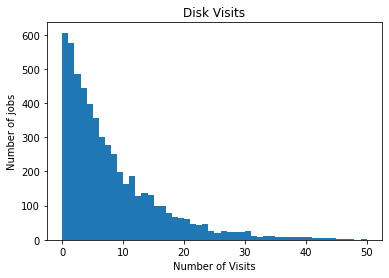

In [40]:
the_list = []
for key in disk_visits:
    the_list.append(disk_visits[key])

N = 50
bins = np.linspace(0,N,N+1)
answer = plt.hist(the_list,bins = bins)
plt.title("Disk Visits")
plt.ylabel("Number of jobs")
plt.xlabel("Number of Visits")
plt.show()

